In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./Amtrak.csv')

In [3]:
df

,M,Ridership
0,1991/01,1708.917
1,1991/02,1620.586
2,1991/03,1972.715
3,1991/04,1811.665
4,1991/05,1974.964
...,...,...
154,2003/11,2076.054
155,2003/12,2140.677
156,2004/01,1831.508
157,2004/02,1838.006


In [4]:
df['Month'] = df['M'].apply(lambda x: x.split('/')[1])

In [5]:
df

,M,Ridership,Month
0,1991/01,1708.917,01
1,1991/02,1620.586,02
2,1991/03,1972.715,03
3,1991/04,1811.665,04
4,1991/05,1974.964,05
...,...,...,...
154,2003/11,2076.054,11
155,2003/12,2140.677,12
156,2004/01,1831.508,01
157,2004/02,1838.006,02


In [6]:
df.loc[df['Month'] == '01', :]

,M,Ridership,Month
0,1991/01,1708.917,01
12,1992/01,1614.827,01
24,1993/01,1705.259,01
36,1994/01,1563.365,01
48,1995/01,1548.415,01
60,1996/01,1381.758,01
72,1997/01,1396.588,01
84,1998/01,1570.330,01
96,1999/01,1599.427,01
108,00/01,1541.660,01


Text(0.5, 1.0, 'Line Chart')

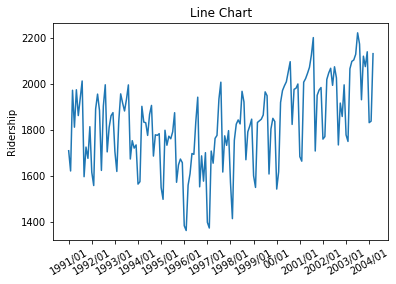

In [7]:
plt.plot(df['Ridership'])
plt.xticks(df.loc[df['Month'] == '01', :].index.tolist(), labels = df.loc[df['Month'] == '01', :]['M'].tolist(), rotation = 30)
plt.ylabel('Ridership')
plt.title('Line Chart')

In [8]:
month_dict = {'01':'Jan',
              '02':'Feb',
              '03':'Mar',
              '04':'Apr',
              '05':'May',
              '06':'Jun',
              '07':'Jul',
              '08':'Aug',
              '09':'Sep',
              '10':'Oct',
              '11':'Nov',
              '12':'Dec'}

In [9]:
df['m'] = df['Month'].apply(lambda x:month_dict[x])

In [10]:
df

,M,Ridership,Month,m
0,1991/01,1708.917,01,Jan
1,1991/02,1620.586,02,Feb
2,1991/03,1972.715,03,Mar
3,1991/04,1811.665,04,Apr
4,1991/05,1974.964,05,May
...,...,...,...,...
154,2003/11,2076.054,11,Nov
155,2003/12,2140.677,12,Dec
156,2004/01,1831.508,01,Jan
157,2004/02,1838.006,02,Feb


In [11]:
d = df[['M', 'm', 'Ridership']]
d

,M,m,Ridership
0,1991/01,Jan,1708.917
1,1991/02,Feb,1620.586
2,1991/03,Mar,1972.715
3,1991/04,Apr,1811.665
4,1991/05,May,1974.964
...,...,...,...
154,2003/11,Nov,2076.054
155,2003/12,Dec,2140.677
156,2004/01,Jan,1831.508
157,2004/02,Feb,1838.006


In [12]:
pd.get_dummies(d[['m']])

,m_Apr,m_Aug,m_Dec,m_Feb,m_Jan,m_Jul,m_Jun,m_Mar,m_May,m_Nov,m_Oct,m_Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,0,0,0,0,0,0,0,0,0,1,0,0
155,0,0,1,0,0,0,0,0,0,0,0,0
156,0,0,0,0,1,0,0,0,0,0,0,0
157,0,0,0,1,0,0,0,0,0,0,0,0


In [13]:
df = pd.concat([df, pd.get_dummies(d[['m']])], axis = 1)

In [14]:
df

,M,Ridership,Month,m,m_Apr,m_Aug,m_Dec,m_Feb,m_Jan,m_Jul,m_Jun,m_Mar,m_May,m_Nov,m_Oct,m_Sep
0,1991/01,1708.917,01,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1991/02,1620.586,02,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1991/03,1972.715,03,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1991/04,1811.665,04,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1991/05,1974.964,05,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2003/11,2076.054,11,Nov,0,0,0,0,0,0,0,0,0,1,0,0
155,2003/12,2140.677,12,Dec,0,0,1,0,0,0,0,0,0,0,0,0
156,2004/01,1831.508,01,Jan,0,0,0,0,1,0,0,0,0,0,0,0
157,2004/02,1838.006,02,Feb,0,0,0,1,0,0,0,0,0,0,0,0


In [15]:
df = df.drop(['Month', 'm'], axis = 1)
df

,M,Ridership,m_Apr,m_Aug,m_Dec,m_Feb,m_Jan,m_Jul,m_Jun,m_Mar,m_May,m_Nov,m_Oct,m_Sep
0,1991/01,1708.917,0,0,0,0,1,0,0,0,0,0,0,0
1,1991/02,1620.586,0,0,0,1,0,0,0,0,0,0,0,0
2,1991/03,1972.715,0,0,0,0,0,0,0,1,0,0,0,0
3,1991/04,1811.665,1,0,0,0,0,0,0,0,0,0,0,0
4,1991/05,1974.964,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2003/11,2076.054,0,0,0,0,0,0,0,0,0,1,0,0
155,2003/12,2140.677,0,0,1,0,0,0,0,0,0,0,0,0
156,2004/01,1831.508,0,0,0,0,1,0,0,0,0,0,0,0
157,2004/02,1838.006,0,0,0,1,0,0,0,0,0,0,0,0


In [16]:
train = df.iloc[:int(len(df)*0.8), :].reset_index(drop=True)
test = df.iloc[int(len(df)*0.8):, :].reset_index(drop=True)

In [17]:
train

,M,Ridership,m_Apr,m_Aug,m_Dec,m_Feb,m_Jan,m_Jul,m_Jun,m_Mar,m_May,m_Nov,m_Oct,m_Sep
0,1991/01,1708.917,0,0,0,0,1,0,0,0,0,0,0,0
1,1991/02,1620.586,0,0,0,1,0,0,0,0,0,0,0,0
2,1991/03,1972.715,0,0,0,0,0,0,0,1,0,0,0,0
3,1991/04,1811.665,1,0,0,0,0,0,0,0,0,0,0,0
4,1991/05,1974.964,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2001/03,2007.928,0,0,0,0,0,0,0,1,0,0,0,0
123,2001/04,2023.792,1,0,0,0,0,0,0,0,0,0,0,0
124,2001/05,2047.008,0,0,0,0,0,0,0,0,1,0,0,0
125,2001/06,2072.913,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
scaler = MinMaxScaler()

In [19]:
train['Ridership'] = scaler.fit_transform(train['Ridership'].values.reshape(-1, 1))
test['Ridership'] = scaler.transform(test['Ridership'].values.reshape(-1, 1))

In [20]:
train

,M,Ridership,m_Apr,m_Aug,m_Dec,m_Feb,m_Jan,m_Jul,m_Jun,m_Mar,m_May,m_Nov,m_Oct,m_Sep
0,1991/01,0.454473,0,0,0,0,1,0,0,0,0,0,0,0
1,1991/02,0.339138,0,0,0,1,0,0,0,0,0,0,0,0
2,1991/03,0.798918,0,0,0,0,0,0,0,1,0,0,0,0
3,1991/04,0.588632,1,0,0,0,0,0,0,0,0,0,0,0
4,1991/05,0.801854,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2001/03,0.844896,0,0,0,0,0,0,0,1,0,0,0,0
123,2001/04,0.865609,1,0,0,0,0,0,0,0,0,0,0,0
124,2001/05,0.895923,0,0,0,0,0,0,0,0,1,0,0,0
125,2001/06,0.929747,0,0,0,0,0,0,1,0,0,0,0,0


In [21]:
def timeseries(train):
  x = list()
  y = list()

  for i in range(len(train)-1):
    x.append(train.iloc[i, :].to_numpy())
    y.append(train['Ridership'][i+1])

  return x, y

In [22]:
trainx, trainy = timeseries(train.iloc[:, 1:])

In [23]:
testx, testy = timeseries(test.iloc[:, 1:])

In [24]:
model = LinearRegression()

In [25]:
model.fit(trainx, trainy)

LinearRegression()

In [26]:
pred = model.predict(testx)
pred

array([0.6297615 , 0.60330502, 0.72117856, 0.80478458, 0.45697606,
       0.42432758, 0.87954197, 0.82417559, 0.89407166, 0.83109781,
       0.93090959, 0.96597656, 0.43808086, 0.63211188, 0.68422562,
       0.67930135, 0.469629  , 0.4443624 , 0.85656572, 0.87485484,
       0.94904766, 0.87044897, 1.07831202, 1.12719021, 0.59897773,
       0.84684171, 0.90706344, 0.916302  , 0.62674294, 0.50257593,
       0.9529264 ])

In [27]:
Predict = scaler.inverse_transform(pred.reshape(-1, 1))
Predict

array([[1843.16429382],
       [1822.90220252],
       [1913.17741985],
       [1977.20834033],
       [1710.83397102],
       [1685.82964408],
       [2034.4624125 ],
       [1992.05923972],
       [2045.59019075],
       [1997.36072808],
       [2073.80307017],
       [2100.65963463],
       [1696.36279706],
       [1844.96436365],
       [1884.87645773],
       [1881.10512624],
       [1720.52441388],
       [1701.17360952],
       [2016.86570882],
       [2030.87270239],
       [2087.69438541],
       [2027.49839721],
       [2186.69343619],
       [2224.12753214],
       [1819.58807916],
       [2009.418424  ],
       [2055.54013852],
       [2062.61563328],
       [1840.85248451],
       [1745.75731696],
       [2090.6649801 ]])

In [28]:
Result = pd.DataFrame(Predict, columns = ['Pred'], index = test['M'][1:].tolist())
Result

,Pred
2001/09,1843.164294
2001/10,1822.902203
2001/11,1913.177420
2001/12,1977.208340
2002/01,1710.833971
2002/02,1685.829644
2002/03,2034.462412
2002/04,1992.059240
2002/05,2045.590191
2002/06,1997.360728


In [29]:
Result['Real'] = scaler.inverse_transform(test['Ridership'].values[1:].reshape(-1, 1))

In [30]:
Result

,Pred,Real
2001/09,1843.164294,1707.693
2001/10,1822.902203,1950.716
2001/11,1913.177420,1973.614
2001/12,1977.208340,1984.729
2002/01,1710.833971,1759.629
2002/02,1685.829644,1770.595
2002/03,2034.462412,2019.912
2002/04,1992.059240,2048.398
2002/05,2045.590191,2068.763
2002/06,1997.360728,1994.267


In [31]:
origin = train.copy()
origin['Ridership'] = scaler.inverse_transform(origin['Ridership'].values.reshape(-1, 1))

In [32]:
origin

,M,Ridership,m_Apr,m_Aug,m_Dec,m_Feb,m_Jan,m_Jul,m_Jun,m_Mar,m_May,m_Nov,m_Oct,m_Sep
0,1991/01,1708.917,0,0,0,0,1,0,0,0,0,0,0,0
1,1991/02,1620.586,0,0,0,1,0,0,0,0,0,0,0,0
2,1991/03,1972.715,0,0,0,0,0,0,0,1,0,0,0,0
3,1991/04,1811.665,1,0,0,0,0,0,0,0,0,0,0,0
4,1991/05,1974.964,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2001/03,2007.928,0,0,0,0,0,0,0,1,0,0,0,0
123,2001/04,2023.792,1,0,0,0,0,0,0,0,0,0,0,0
124,2001/05,2047.008,0,0,0,0,0,0,0,0,1,0,0,0
125,2001/06,2072.913,0,0,0,0,0,0,1,0,0,0,0,0


In [33]:
Month = origin['M'].tolist()+Result.index.tolist()

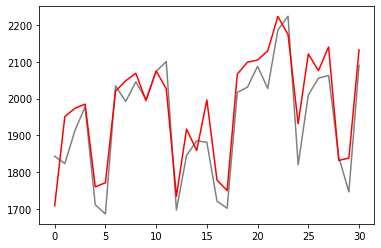

In [34]:
plt.plot(Result['Pred'].tolist(), color = 'gray')
plt.plot(Result['Real'].tolist(), color = 'red')

([<matplotlib.axis.XTick at 0x7f7a0f0a14d0>,
 [Text(0, 0, '1991/01'),
  Text(0, 0, '1993/07'),
  Text(0, 0, '1996/01'),
  Text(0, 0, '1998/07'),
  Text(0, 0, '2001/01'),
  Text(0, 0, '2003/08')])

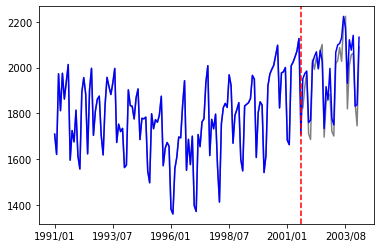

In [35]:
plt.plot(origin['Ridership'].tolist()+Result['Pred'].tolist(), color = 'gray')
plt.plot(origin['Ridership'].tolist()+Result['Real'].tolist(), color = 'blue')
plt.axvline(x = len(origin), c = 'r', linestyle = '--')

plt.xticks([0, 30, 60, 90, 120, 150], labels = [Month[0], Month[30], Month[60], Month[90], Month[120], Month[150]])

In [36]:
model.coef_

array([ 0.83372992,  0.05395005, -0.37826764, -0.3138347 ,  0.34184008,
       -0.10143659,  0.09661483,  0.14971564,  0.01506419, -0.03119338,
        0.04607374, -0.01260523,  0.13407901])

In [37]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(Result['Real'], Result['Pred'])**0.5

In [38]:
RMSE

68.89940262870093

([], <a list of 0 Text major ticklabel objects>)

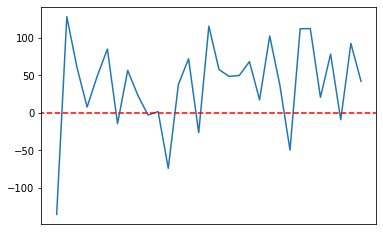

In [39]:
Result['Residual'] = Result['Real'] - Result['Pred']

plt.plot(Result['Residual'])
plt.axhline(0, Result['Residual'].min(), Result['Residual'].max(), color = 'red', linestyle = '--')
plt.xticks([])